Universidade Federal de Campina Grande
<br>
Disciplina: Machine Learning
<br>
Professor: Leandro Balby
<br>
Aluna: Larissa Lucena Vasconcelos
<br>
Lab 01 - Regressão Linear 
<br>

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from numpy import *
import numpy as np
import time

In [59]:
def compute_error_for_given_points(b, m, points):
    total_error = 0
    for i in range(0, len(points)):
        x = points[i,0]
        y = points[i,1]
        total_error += (y - (m * x + b)) **2
    return total_error / float(len(points))   

def step_gradient(b_current, m_current, points, learningRate):
    #gradient descent
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i,0]
        y = points[i,1] 
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current)) #devivada w0
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current)) #derivada w1        
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)   
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    rss_arr = [] 
    
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
        rss_arr.append(compute_error_for_given_points(b, m, points))    
        
        #caso seja necessario atualizar o learning rate
        #learning_rate/= num_iterations
    return [b,m], rss_arr

#modificação da questao 5
def gradient_descent_runner_norm(points, starting_b, starting_m, learning_rate, tolerance):
    b = starting_b
    m = starting_m
  
    x = np.array([b,m])
    gradient_norm = np.linalg.norm(x)
    gradient_norm_arr = []
    
    #usando < para o algoritmo parar, já que como a norma sempre cresce, a condicao original nao é atendida
    while (gradient_norm < tolerance):
        gradient_norm_arr.append(gradient_norm)
        #print('Gradient norm at iteration #', len(gradient_norm_arr)-1, ': ',gradient_norm)
        b, m = step_gradient(b, m, array(points), learning_rate)
        x = np.array([b,m])
        gradient_norm = np.linalg.norm(x)  
        
        #caso seja necessario atualizar o learning rate
        learning_rate/= math.sqrt(len(gradient_norm_arr))
        #print(b)
        #print(m)
        
    return [b,m], gradient_norm_arr

def media(points):
    x_sum = 0
    y_sum = 0
    N = float(len(points))
    
    for i in range(0, len(points)):
        x = points[i,0]
        y = points[i,1]
        x_sum += x
        y_sum += y
    return [x_sum/N, y_sum/N]
   

def closed_form(points, b, m):
    num = 0
    den = 0
    x_med,y_med = media(points)  
    
    for i in range(0, len(points)):
        x = points[i,0]
        y = points[i,1]
        num += (x - x_med)*(y - y_med)
        den += (x - x_med)**2
        
    new_m = num/den       
    new_b = y_med - m * x_med
    return [new_b, new_m]

def closed_form_runner(points, starting_b, starting_m, num_iterations):
    b = starting_b
    m = starting_m
        
    #usando os valores de b e m da questão 6 (e 4)
    while not(b < -38 and m < 6):
        b, m = closed_form(array(points), b, m)
    return [b,m]

#learning_rate = False, num_iterations = False, question = 2, tolerance = 0
def run(learning_rate = False, num_iterations = False, question = 2, tolerance = 0):
    
    points = genfromtxt("income.csv", delimiter=",")
    
    #hyperparameters
    if not learning_rate:
        learning_rate = 0.0001
    
    #y = mx + b (slope formula)
    initial_m = 0
    initial_b = 0
    
    if not num_iterations:
        num_iterations = 1000
        
    if question == 2:
        [b,m],rss = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
        print ("b: ", b)
        print ("m: ", m)
        print("RSS:", compute_error_for_given_points(b, m, points))
        
        for i in range(num_iterations):
            print("RSS at iteration #",i+1,": ", rss[i])
    
    elif question == 3:
        [b,m],rss = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
        print ("b: ", b)
        print ("m: ", m)
        print("RSS:", compute_error_for_given_points(b, m, points))
        plt.figure(1)
        plt.plot(np.array(rss))
        plt.title("RSS vs Iteration")
        plt.ylabel('RSS')
        plt.xlabel('Iterations')
        plt.show()
        
    elif question == 4:
        [b,m],rss = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
        print ("b: ", b)
        print ("m: ", m)
        print("RSS:", compute_error_for_given_points(b, m, points))
        
    elif question == 5:
        inicio = time.time()
        [b_norm,m_norm], gradient_norm_arr = gradient_descent_runner_norm(points, initial_b, initial_m, learning_rate,
                                                                     tolerance)
        fim = time.time()
        print("Tempo de execução (norma do gradiente):",fim - inicio)
        print ("b: ", b_norm)
        print ("m: ", m_norm)
        print("RSS: ", compute_error_for_given_points(b_norm, m_norm, points))
        plt.figure(2)
        plt.plot(np.array(gradient_norm_arr))
        plt.title("Gradient Norm vs Iteration")
        plt.ylabel('Gradient Norm')
        plt.xlabel('Iterations')
        plt.show()
        
    elif question == 6:
        [b_norm,m_norm], gradient_norm_arr = gradient_descent_runner_norm(points, initial_b, initial_m, learning_rate,
                                                                     tolerance)
        print ("b: ", b_norm)
        print ("m: ", m_norm)
        print("RSS: ", compute_error_for_given_points(b_norm, m_norm, points))
        
    elif question == 7:
        inicio = time.time()
        [b_closed,m_closed] = closed_form_runner(points, initial_b, initial_m, num_iterations)
        fim = time.time()
        print("Tempo de execução:",fim - inicio)
        print ("b: ", b_closed)
        print ("m: ", m_closed)
        print("RSS", compute_error_for_given_points(b_closed, m_closed, points))
        
    
    
    
    
    

#if __name__== '__main__':
   # run()



In [41]:
#Questões 1 e 2
#learning_rate = False, num_iterations = False, question = 2, tolerance = 0
run(question = 2)

b:  -0.18234255376510086
m:  3.262182267596014
RSS: 103.39842291729676
RSS at iteration # 1 :  2648.2381266261386
RSS at iteration # 2 :  2381.1735926230144
RSS at iteration # 3 :  2142.151013653971
RSS at iteration # 4 :  1928.2259499305476
RSS at iteration # 5 :  1736.7631314659504
RSS at iteration # 6 :  1565.4039948653665
RSS at iteration # 7 :  1412.0376287932477
RSS at iteration # 8 :  1274.7747702022896
RSS at iteration # 9 :  1151.924530990372
RSS at iteration # 10 :  1041.9735683871631
RSS at iteration # 11 :  943.5674424757678
RSS at iteration # 12 :  855.4939311975465
RSS at iteration # 13 :  776.6680973019634
RSS at iteration # 14 :  706.1189232850785
RSS at iteration # 15 :  642.9773496759485
RSS at iteration # 16 :  586.4655693176774
RSS at iteration # 17 :  535.8874457621318
RSS at iteration # 18 :  490.61993774500473
RSS at iteration # 19 :  450.105424101551
RSS at iteration # 20 :  413.8448345756185
RSS at iteration # 21 :  381.3915019021827
RSS at iteration # 22 :  35

RSS at iteration # 407 :  104.23295267193649
RSS at iteration # 408 :  104.231537432171
RSS at iteration # 409 :  104.23012221932484
RSS at iteration # 410 :  104.22870703339736
RSS at iteration # 411 :  104.22729187438813
RSS at iteration # 412 :  104.22587674229668
RSS at iteration # 413 :  104.22446163712226
RSS at iteration # 414 :  104.22304655886464
RSS at iteration # 415 :  104.22163150752331
RSS at iteration # 416 :  104.2202164830975
RSS at iteration # 417 :  104.2188014855869
RSS at iteration # 418 :  104.2173865149909
RSS at iteration # 419 :  104.21597157130904
RSS at iteration # 420 :  104.21455665454086
RSS at iteration # 421 :  104.21314176468573
RSS at iteration # 422 :  104.2117269017432
RSS at iteration # 423 :  104.21031206571274
RSS at iteration # 424 :  104.2088972565939
RSS at iteration # 425 :  104.20748247438608
RSS at iteration # 426 :  104.20606771908889
RSS at iteration # 427 :  104.20465299070169
RSS at iteration # 428 :  104.20323828922389
RSS at iteration 

RSS at iteration # 698 :  103.82225167952525
RSS at iteration # 699 :  103.82084425169612
RSS at iteration # 700 :  103.81943685063766
RSS at iteration # 701 :  103.8180294763494
RSS at iteration # 702 :  103.81662212883067
RSS at iteration # 703 :  103.81521480808117
RSS at iteration # 704 :  103.81380751410026
RSS at iteration # 705 :  103.81240024688744
RSS at iteration # 706 :  103.81099300644226
RSS at iteration # 707 :  103.80958579276418
RSS at iteration # 708 :  103.80817860585266
RSS at iteration # 709 :  103.80677144570726
RSS at iteration # 710 :  103.80536431232744
RSS at iteration # 711 :  103.80395720571259
RSS at iteration # 712 :  103.8025501258623
RSS at iteration # 713 :  103.80114307277606
RSS at iteration # 714 :  103.79973604645339
RSS at iteration # 715 :  103.79832904689377
RSS at iteration # 716 :  103.79692207409656
RSS at iteration # 717 :  103.79551512806148
RSS at iteration # 718 :  103.79410820878779
RSS at iteration # 719 :  103.79270131627518
RSS at itera

b:  -0.18234255376510086
m:  3.262182267596014
RSS: 103.39842291729676


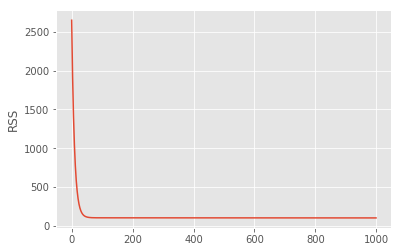

In [42]:
#Questão 3
run(question = 3)

Tarefa 3: O RSS diminui com a evolução das iterações

In [44]:
#Questão 4
run(question = 4, learning_rate = 0.001, num_iterations = 40000)

b:  -38.56338817232996
m:  5.546927515279262
RSS: 29.86601280396424


Tarefa 4: Para atingir os valores aproximados de -39 e 5 para w0 e w1 respectivamente, temos, como uma das opções, os valores de learning rate= 0.001 e número de iterações = 40000.

Tempo de execução (norma do gradiente): 0.0039975643157958984
b:  0.03227069086448943
m:  0.5641597181073768
RSS:  2043.2091851680102


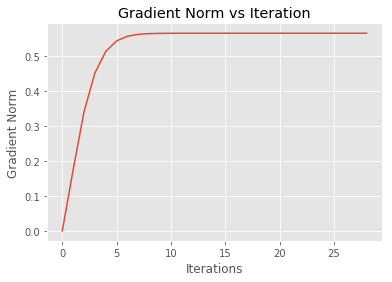

In [60]:
#Questão 5
#tolerance de 3.26 vem do resultado da norma do gradiente final da execução com 1000 iterações e 0.0001 de learning rate
#tolerance de 0.5650819277094837 só para ter alguns valores para plotar o gráfico 
#a partir da 28 iteração, se atualizarmos o learning rate, o valor se mantém esse
#usando condição de parada norma < tolerancia, já que como a norma sempre cresce, a condicao original nao é atendida
run(question = 5, tolerance = 0.5650819277094837)

In [61]:
#Questão 6
run(question = 6, tolerance = 39, learning_rate = 0.001)

In [50]:
#Questão 7
run (question = 7)

Tempo de execução: 0.0
b:  -39.44625667909617
m:  5.599482874119919
RSS 29.82881619900623
